<a href="https://colab.research.google.com/github/wdconinc/data-analysis-recipes-fitting-a-model-to-data/blob/master/Exercises_in_%22Data_Analysis_Recipes_Fitting_a_Model_to_Data%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Recipes: Fitting a Model to Data

This notebook works through the exercises in [arXiv:1008.4686v1](https://arxiv.org/abs/1008.4686) [astro-ph.IM] "Data Analysis Recipes: Fitting a Model to Data", by David W. Hogg, Jo Bovy, and Dustin Lang, hereafter the "paper".

Copyright of the material in the paper belongs to the original authors (see footnote 1 in the paper for license information). Fair use exception (educational use, excerpt) justifies copying the data from Table 1 into this notebook. Fair use exception (educational use, excerpt) justifies reproduction of some formulas for implementation in this notebook.

The license of the solutions to the paper's exercises in this notebook is Creative Commons Attribution Share Alike 4.0, CC BY-SA 4.0. Original author is Wouter Deconinck, William & Mary.

## Preamble

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Dataset

In [2]:
X = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146], dtype = float)
Y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344], dtype = float)

In [3]:
sigma_Y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22], dtype = float)
sigma_X = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5], dtype = float)
rho_XY = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.50, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56], dtype = float)

No correlations $\rho_{xy}$ are shown in the plot below.

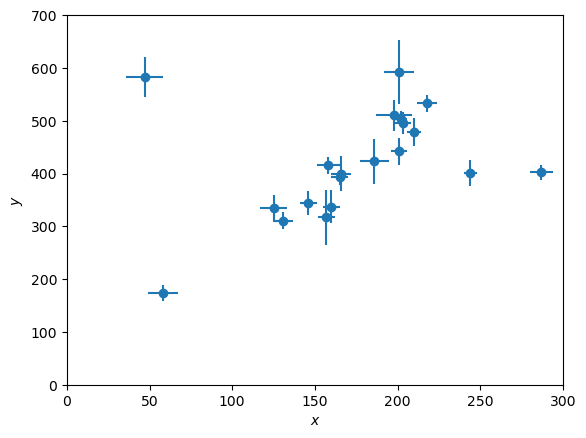

In [5]:
plt.errorbar(X, Y, xerr = sigma_X, yerr = sigma_Y, marker = "o", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

## Exercise 1: Analytical linear least squares without outliers

In [6]:
Y1 = Y[4:]
A1 = np.column_stack([np.ones_like(X[4:]), X[4:]])
C1 = np.diag(sigma_Y[4:]**2)

In [7]:
X1 = inv(A1.T @ inv(C1) @ A1) @ (A1.T @ inv(C1) @ Y1)
S1 = inv(A1.T @ inv(C1) @ A1)
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (X1[0], np.sqrt(S1[0][0]), 
                                                 X1[1], np.sqrt(S1[1][1])))

b + m x = (34.047728 +/- 18.246167) + (2.239921 +/- 0.107780) x


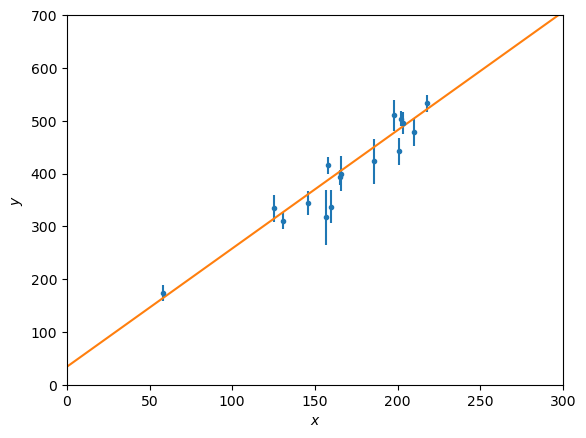

In [8]:
plt.errorbar(X[4:], Y[4:], yerr = sigma_Y[4:], marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
y = A @ X1
plt.plot(x, y);

## Exercise 2: Analytical linear least squares with outliers

In [9]:
Y2 = Y
A2 = np.column_stack([np.ones_like(X), X])
C2 = np.diag(sigma_Y**2)

In [10]:
X2 = inv(A2.T @ inv(C2) @ A2) @ (A2.T @ inv(C2) @ Y2)
S2 = inv(A2.T @ inv(C2) @ A2)
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (X2[0], np.sqrt(S2[0][0]),
                                                 X2[1], np.sqrt(S2[1][1])))

b + m x = (213.273492 +/- 14.394033) + (1.076748 +/- 0.077407) x


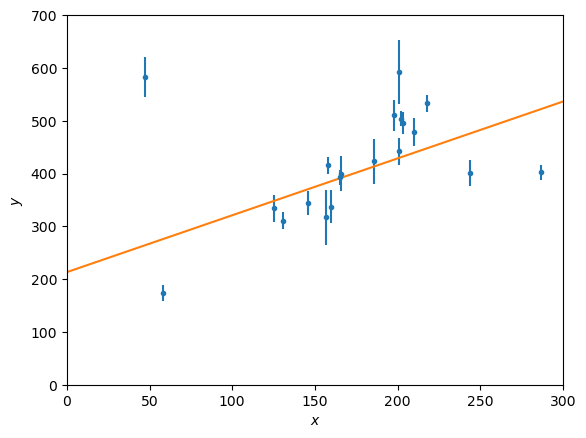

In [11]:
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
y = A @ X2
plt.plot(x, y);

## Exercise 3: Analytical quadratic solution with outliers

In [12]:
Y3 = Y[4:]
A3 = np.column_stack([np.ones_like(X[4:]), X[4:], X[4:]**2])
C3 = np.diag(sigma_Y[4:]**2)

In [13]:
X3 = inv(A3.T @ inv(C3) @ A3) @ (A3.T @ inv(C3) @ Y3)
S3 = inv(A3.T @ inv(C3) @ A3)
print("b + m x + q x**2 = (%f +/- %f) + (%f +/- %f) x + (%f +/- %f) x**2" % (X3[0], np.sqrt(S3[0][0]),
                                                                             X3[1], np.sqrt(S3[1][1]),
                                                                             X3[2], np.sqrt(S3[2][2])))

b + m x + q x**2 = (72.894626 +/- 38.911555) + (1.596050 +/- 0.579748) x + (0.002299 +/- 0.002034) x**2


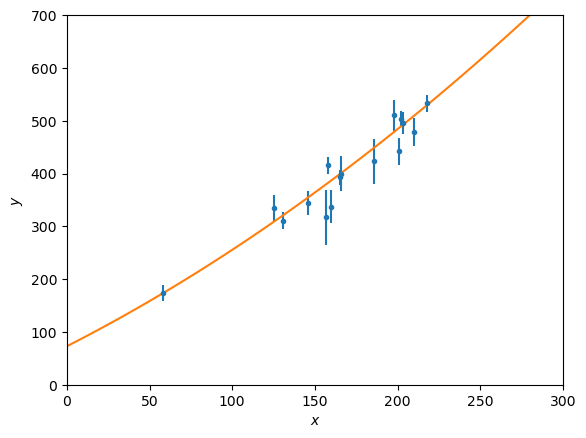

In [14]:
plt.errorbar(X[4:], Y[4:], yerr = sigma_Y[4:], marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x, x**2])
y = A @ X3
plt.plot(x, y);

## Exercise 4: Maximum likelihood for single value with normal measurement noise

The frequency distribution for $t_i$ is:
$$ p(t_i | \sigma_{ti}, T) = \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\left( -\frac{[t_i - T]^2}{2\sigma_{ti}^2} \right). $$
We can use this to calculate the likelihood
$$ \mathcal{L} = \prod_{i=1}^N p(t_i | \sigma_{ti}, T), $$
and log likelihood 
$$ \ln \mathcal{L} = K - \sum_{i=1}^N \frac{[t_i - T]^2}{2\sigma_{ti}^2}. $$
The maximum log likelihood is obtained when the derivative to $T$ is zero:
$$ 0 = \frac{d}{dT} \ln \mathcal{L} = \sum_{i=1}^N \frac{[t_i - T]}{\sigma_{ti}^2}. $$
Indeed this is a maximum:
$$ \frac{d}{dT} \ln \mathcal{L} = - \sum_{i=1}^N \frac{1}{\sigma_{ti}^2} < 0. $$
The maximum log likelihood is obtained when:
$$ T = \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{ti}^2}}, $$
or an expression given by the weighted mean.

## Exercise 5: Derivation of analytical expression

Starting from the definition of $\chi^2$ as
$$ \chi^2 = [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] $$
we can take a derivative with respect to $\mathbf{X}$ as
$$ 0 = \frac{d}{d\mathbf{X}} \chi^2 = -\mathbf{A}^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] -  [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} \mathbf{A} $$
or
$$ \mathbf{A}^T \mathbf{C}^{-1} \mathbf{A} \mathbf{X} = \mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y} $$
which is satisfied for
$$ \mathbf{X} = [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{A}]^{-1} [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y}] $$

## Exercises 6, 7: Mixture model using Metropolis-Hastings MCMC

The (unnormalized) likelihood $\mathcal{L}$ in (17) in the paper can be implemented:

In [15]:
def likelihood(x, y, sigma, b, m, Pb = 0.0, Yb = 0.0, Vb = 0.0):
  return np.prod( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2)        * np.exp(-(y-m*x-b)**2/(2*sigma**2))
                 + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2   /(2*(Vb + sigma**2))))

However, it makes more sense for reasons of numerical stability to use $\ln\mathcal{L}$, which turns the product into a sum of logs:

In [16]:
def log_likelihood(x, y, sigma, b, m, Pb = 0.0, Yb = 0.0, Vb = 0.0):
  return np.sum( np.log( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2)        * np.exp(-(y-m*x-b)**2/(2*sigma**2))
                        + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2/(2*(Vb + sigma**2)))))

b = 40.0
m = 2.2
np.testing.assert_almost_equal(np.exp(log_likelihood(X, Y, sigma_Y, b, m)), likelihood(X, Y, sigma_Y, b, m))

We first try to find the maximum likelihood for $P_b$ equal to zero, which should revert to the solutions of Exercise 1 (ignoring outliers) and Exercise 2 (including outliers).

### Reproducing Exercise 1: Analytical linear least squares without outliers

TypeError: must be real number, not str

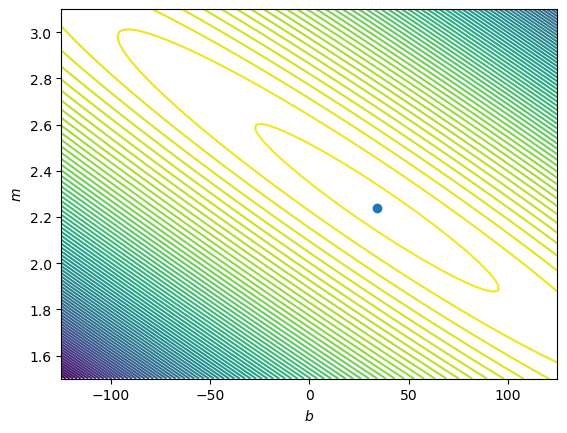

In [20]:
b = np.linspace(-125.0, +125.0, 100)
m = np.linspace(1.5, 3.1, 100)

L = np.ndarray((len(m), len(b)))
for i in range(len(m)):
  for j in range(len(b)):
    L[i,j] = log_likelihood(X[4:], Y[4:], sigma_Y[4:], b[j], m[i])

plt.contour(b, m, L, 100)

x0 = np.array([40.0, 2.2])
res = opt.minimize(lambda x: -log_likelihood(X[4:], Y[4:], sigma_Y[4:], x[0], x[1]), x0)
plt.plot(res.x[0], res.x[1], 'o')
plt.xlabel("$b$"); plt.ylabel("$m$");
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (res.x[0], '?'),
                                                 res.x[1], '?')
print("chi^2(b = %f, m = %f) = %f" % (res.x[0], res.x[1], res.fun))

TODO: We could get the covariance matrix from the Jacobian: $\mathbf{C} \propto \mathbf{J}^T \mathbf{J}$

### Reproducing Exercise 2: Analytical linear least squares with outliers

TypeError: must be real number, not str

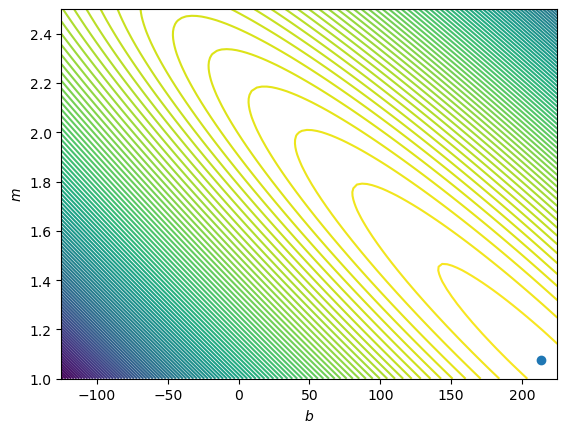

In [22]:
b = np.linspace(-125.0, +225.0, 100)
m = np.linspace(1.0, 2.5, 100)

L = np.ndarray((len(m), len(b)))
for i in range(len(m)):
  for j in range(len(b)):
    L[i,j] = log_likelihood(X, Y, sigma_Y, b[j], m[i])

plt.contour(b, m, L, 100)

x0 = np.array([40.0, 2.2])
res = opt.minimize(lambda x: -log_likelihood(X, Y, sigma_Y, x[0], x[1]), x0)
plt.plot(res.x[0], res.x[1], 'o')
plt.xlabel("$b$"); plt.ylabel("$m$");
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (res.x[0], '?'),
                                                 res.x[1], '?')
print("chi^2(b = %f, m = %f) = %f" % (res.x[0], res.x[1], res.fun))

TODO: We could get the covariance matrix from the Jacobian: $\mathbf{C} \propto \mathbf{J}^T \mathbf{J}$

### Metropolis-Hastings Markov Chain Monte Carlo

We implement the Metropolis-Hasting Markov Chain Monte Carlo algorithm to sample the posterior distribution. For inspiration on how to implement this, see [Joseph Moukarzel's From Scratch post](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a). 

In [23]:
def metropolis_hastings(log_likelihood, acceptance, prior, transition, x0, iterations = 1000):
    x_old = x0
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new = transition(x_old)
        L_old = log_likelihood(x_old)
        L_new = log_likelihood(x_new) 
        if (acceptance(L_old + np.log(prior(x_old)), L_new + np.log(prior(x_new)))):            
            x_old = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)

    return np.array(accepted), np.array(rejected)

We now apply this with the following conditions:

* an acceptance criterion if $U(0,1) < \exp(\mathcal{L}_{new} - \mathcal{L}_{old})$,
* an uninformative prior that is flat for $P_b$ in $[0,1]$, and logarithmic in $V_b > 0$,
* a normal step distribution with 'reasonable' widths.



In [24]:
x0 = np.array([34., 2.2, 0.0, 0.0, 0.0])
s0 = np.array([10.0, 0.1, 0.2, 100.0, 100.0])
iterations = 1000000
accepted, rejected = metropolis_hastings(lambda x: log_likelihood(X, Y, sigma_Y, x[0], x[1], x[2], x[3], x[4]),
                                         lambda L_old, L_new: (np.random.uniform(0,1) < np.exp(L_new - L_old)), 
                                         lambda x: 0.0 if (x[2] <= 0 or x[2] >= 1 or x[4] <= 0) else 1.0 / x[4],
                                         lambda x: np.random.normal(x, s0),
                                         x0, iterations)

C:\Users\NIU004\AppData\Local\Temp\ipykernel_15996\3865209980.py:9: RuntimeWarning: divide by zero encountered in log
  if (acceptance(L_old + np.log(prior(x_old)), L_new + np.log(prior(x_new)))):
C:\Users\NIU004\AppData\Local\Temp\ipykernel_15996\3871569432.py:5: RuntimeWarning: invalid value encountered in double_scalars
  lambda L_old, L_new: (np.random.uniform(0,1) < np.exp(L_new - L_old)),
C:\Users\NIU004\AppData\Local\Temp\ipykernel_15996\2879819343.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum( np.log( (1-Pb)* 1/np.sqrt(2*np.pi*sigma**2)        * np.exp(-(y-m*x-b)**2/(2*sigma**2))
C:\Users\NIU004\AppData\Local\Temp\ipykernel_15996\2879819343.py:3: RuntimeWarning: invalid value encountered in sqrt
  + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb)**2/(2*(Vb + sigma**2)))))
C:\Users\NIU004\AppData\Local\Temp\ipykernel_15996\2879819343.py:3: RuntimeWarning: overflow encountered in exp
  + Pb   * 1/np.sqrt(2*np.pi*(Vb + sigma**2)) * np.exp(-(y-Yb

In [25]:
print(100.0 * accepted.shape[0] / (accepted.shape[0] + rejected.shape[0]), "% acceptance rate (target is 50%)")

12.2486 % acceptance rate (target is 50%)


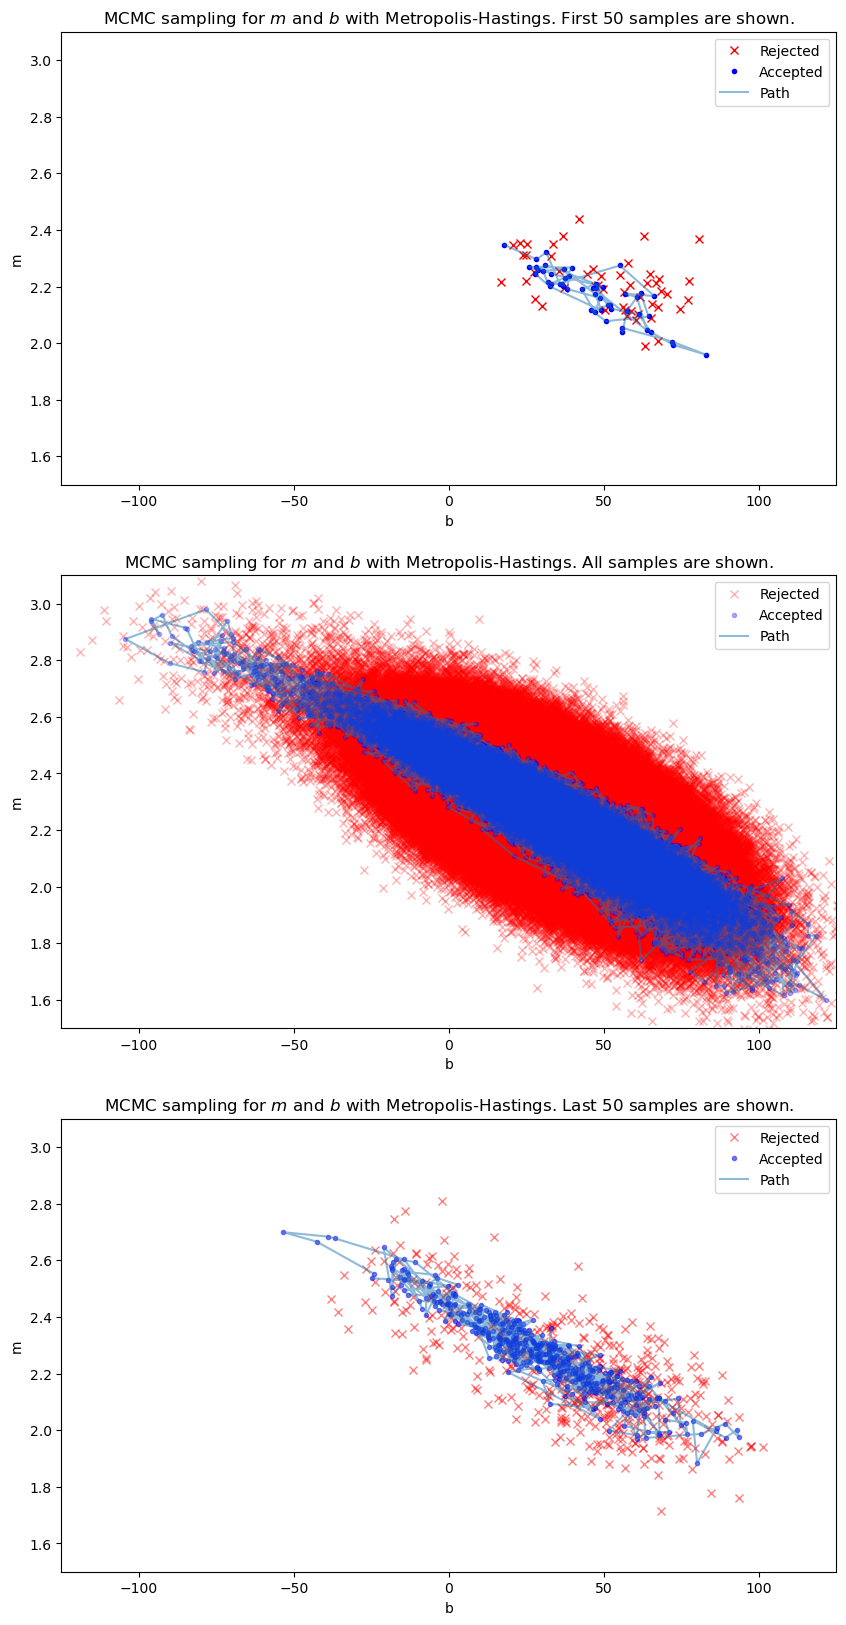

In [26]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label = 'Rejected')
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label = 'Accepted')
ax.plot(accepted[:50,0], accepted[:50,1], label = "Path", alpha = 0.5)
ax.set_xlabel("b");
ax.set_ylabel("m");
ax.set_xlim(-125.0, +125.0);
ax.set_ylim(1.5, 3.1);
ax.legend()
ax.set_title("MCMC sampling for $m$ and $b$ with Metropolis-Hastings. First 50 samples are shown."); 

ax = fig.add_subplot(3,1,2)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label = 'Rejected', alpha = 0.3)
ax.plot(accepted[:,0], accepted[:,1], 'b.', label = 'Accepted', alpha = 0.3)
ax.plot(accepted[:,0], accepted[:,1], label = "Path", alpha = 0.5)
ax.set_xlabel("b");
ax.set_ylabel("m");
ax.set_xlim(-125.0, +125.0);
ax.set_ylim(1.5, 3.1);
ax.legend()
ax.set_title("MCMC sampling for $m$ and $b$ with Metropolis-Hastings. All samples are shown.");

to_show = 500
ax = fig.add_subplot(3,1,3)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label = 'Rejected', alpha = 0.5)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label = 'Accepted', alpha = 0.5)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label = "Path", alpha = 0.5)
ax.set_xlabel("b");
ax.set_ylabel("m");
ax.set_xlim(-125.0, +125.0);
ax.set_ylim(1.5, 3.1);
ax.legend()
ax.set_title("MCMC sampling for $m$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.");

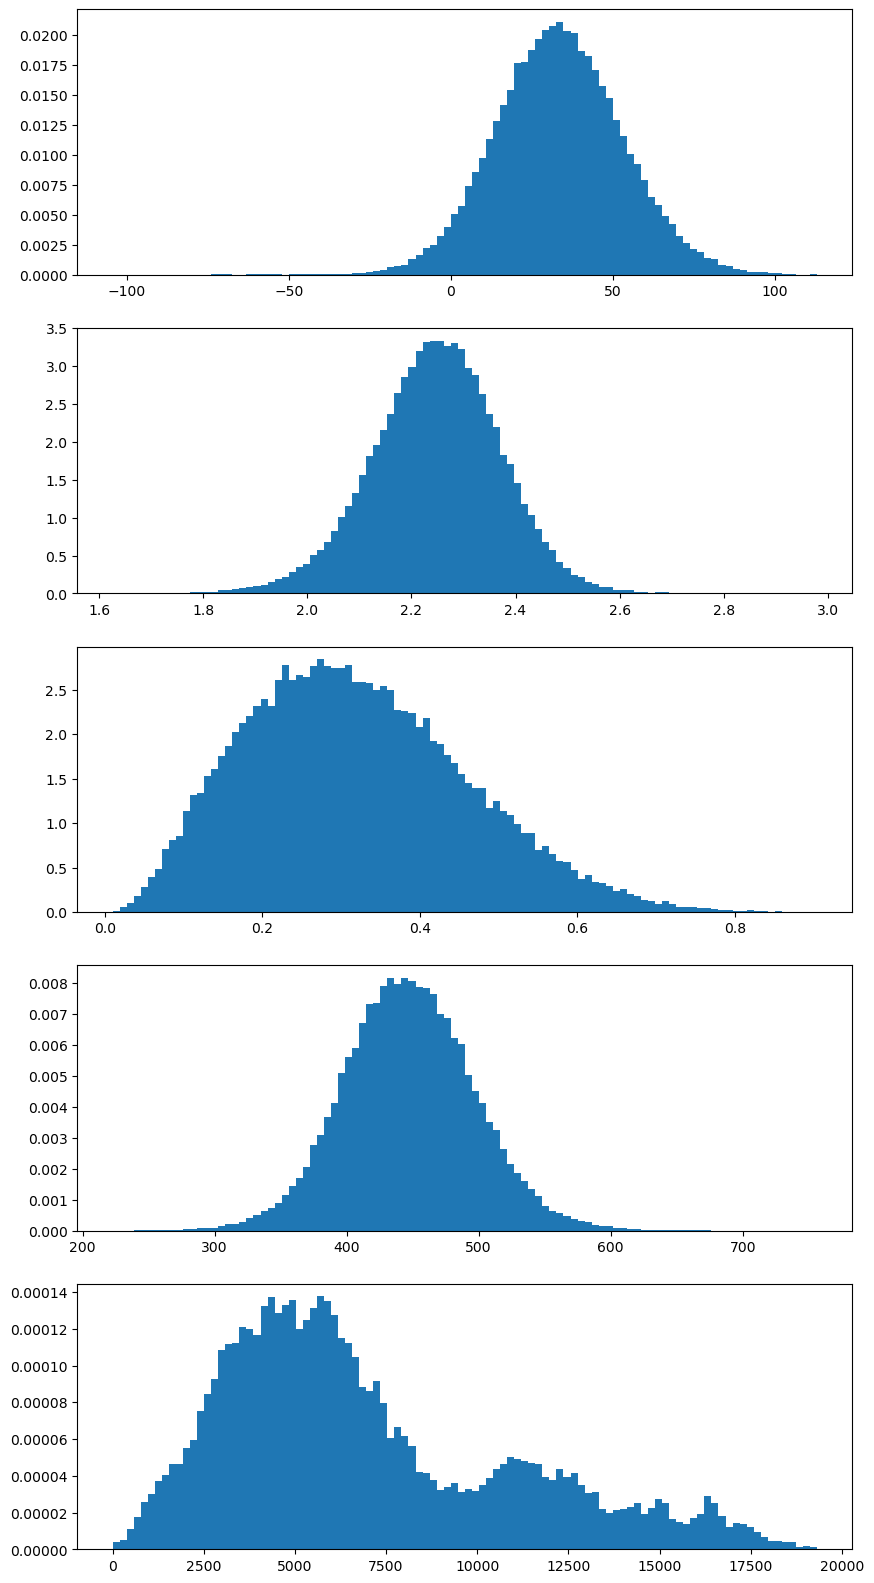

In [27]:
num_accepted = accepted.shape[0]

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(5,1,1)
plt.hist(accepted[int(0.5*num_accepted):,0], density = True, bins = 100);
ax = fig.add_subplot(5,1,2)
plt.hist(accepted[int(0.5*num_accepted):,1], density = True, bins = 100);
ax = fig.add_subplot(5,1,3)
plt.hist(accepted[int(0.5*num_accepted):,2], density = True, bins = 100);
ax = fig.add_subplot(5,1,4)
plt.hist(accepted[int(0.5*num_accepted):,3], density = True, bins = 100);
ax = fig.add_subplot(5,1,5)
plt.hist(accepted[int(0.5*num_accepted):,4], density = True, bins = 100);

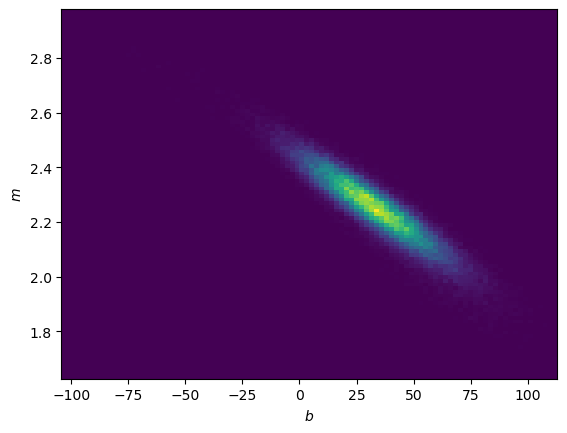

In [28]:
counts, xbins, ybins, image = plt.hist2d(accepted[int(0.5*num_accepted):,0],
                                         accepted[int(0.5*num_accepted):,1],
                                         bins = 100)
plt.xlabel("$b$"); plt.ylabel("$m$");

In [29]:
plt.contour(counts.T, extent = [xbins.min(), xbins.max(), ybins.min(), ybins.max()], linewidths = 2)
plt.xlabel("b"); plt.ylabel("m")
plt.xlim(-125.0, +125.0);
plt.ylim(1.5, 3.1);
plt.plot(np.mean(accepted[int(0.5*num_accepted):,0]), np.mean(accepted[int(0.5*num_accepted):,1]), '.k')
print(, )
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (np.mean(accepted[int(0.5*num_accepted):,0]), np.std(accepted[int(0.5*num_accepted):,0])),
                                                 np.mean(accepted[int(0.5*num_accepted):,1]), np.std(accepted[int(0.5*num_accepted):,1])))

SyntaxError: invalid syntax (2505839983.py, line 6)

(122486, 5)


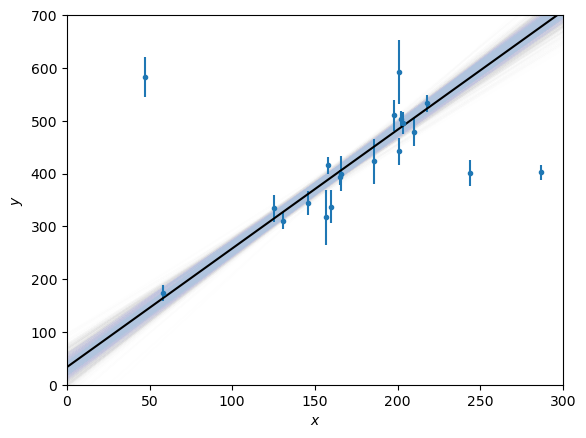

In [32]:
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])
for i in np.random.randint(int(0.8*num_accepted), num_accepted, 1000):
  y = A @ np.array([accepted[i,0], accepted[i,1]])
  plt.plot(x, y, color = 'lightsteelblue', alpha = 0.005);
  
y = A @ np.array([np.mean(accepted[int(0.5*num_accepted):,0]), np.mean(accepted[int(0.5*num_accepted):,1])])
plt.plot(x, y, 'k');
print(accepted.shape)

## Exercises 6, 7: Mixture model using PyStan

### Reproducing Exercise 2: Analytical linear least squares without outliers

In [0]:
import pystan

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    vector[N] sy;
}
parameters {
    real b;
    real m;
}
model {
    y ~ normal(b + m * x, sy);
}
"""

In [0]:
# Put our data in a dictionary
data = {'N': len(X), 'x': X, 'y': Y, 'sy': sigma_Y}

# Compile the model
sm = pystan.StanModel(model_code = model)

# Train the model and generate samples
fit = sm.sampling(data = data, iter = 1000, chains = 4, warmup = 500, thin = 1)

In [0]:
import pandas as pd

summary_dict = fit.summary()

df = pd.DataFrame(summary_dict['summary'], 
                  columns = summary_dict['summary_colnames'], 
                  index = summary_dict['summary_rownames'])

b_mean, m_mean = df['mean']['b'], df['mean']['m']

# Extracting traces
b = fit['b']
m = fit['m']
lp = fit['lp__']

In [0]:
# Plot mean regression line
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "")
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

# Plotting regression line
x_min, x_max = 0.0, 300.0
x_plot = np.linspace(x_min, x_max, 100)
plt.plot(x_plot, b_mean + m_mean * x_plot, '-k')

# Plot a subset of sampled regression lines
np.random.shuffle(m), np.random.shuffle(b)
for i in range(1000):
  plt.plot(x_plot, b[i] + m[i] * x_plot,
           color = 'lightsteelblue', 
           alpha = 0.005 )

plt.title('Fitted Regression Line');

### Mixture of linear signal with normal and constant backgound with normal

See for example the [Stan user guide](https://mc-stan.org/docs/2_19/stan-users-guide/summing-out-the-responsibility-parameter.html).

In [0]:
import pystan

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    vector[N] sy;
}
parameters {
    real b;
    real m;
    simplex[2] Pb;
    real Yb;
    real<lower=0> Vb;
}
model {
    vector[2] log_Pb = log(Pb);
    for (n in 1:N) {
        vector[2] lps = log_Pb;
        real mu = b + m * x[n];
        lps[1] += normal_lpdf(y[n] | mu, sy[n]);
        real sby = sqrt(Vb + sy[n]^2);
        lps[2] += normal_lpdf(y[n] | Yb, sby);
        target += log_sum_exp(lps);
    }
}
"""

In [0]:
# Put our data in a dictionary
data = {'N': len(X), 'x': X, 'y': Y, 'sy': sigma_Y}

# Compile the model
sm = pystan.StanModel(model_code = model)

# Train the model and generate samples
fit = sm.sampling(data = data, iter = 1000, chains = 4, warmup = 500, thin = 1, control = {'max_treedepth': 20})

In [0]:
import pandas as pd

summary_dict = fit.summary()

df = pd.DataFrame(summary_dict['summary'], 
                  columns = summary_dict['summary_colnames'], 
                  index = summary_dict['summary_rownames'])

b_mean, m_mean = df['mean']['b'], df['mean']['m']

# Extracting traces
b = fit['b']
m = fit['m']
lp = fit['lp__']

In [0]:
# Plot mean regression line
plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "")
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

# Plotting regression line
x_min, x_max = 0.0, 300.0
x_plot = np.linspace(x_min, x_max, 100)
plt.plot(x_plot, b_mean + m_mean * x_plot, '-k')

# Plot a subset of sampled regression lines
np.random.shuffle(m), np.random.shuffle(b)
for i in range(1000):
  plt.plot(x_plot, b[i] + m[i] * x_plot,
           color = 'lightsteelblue', 
           alpha = 0.005 )

plt.title('Fitted Regression Line')

## Exercises 6, 7: Full exponential model using PyStan

Binomial prior probability on the data rejection:
$$ p(\{q_i\}_{i=1}^N|P_b,I) = \prod_{i=1}^N [1-P_b]^{q_i} P_b^{[1-q_i]} $$

In [0]:
def prior(q, Pb):
  return np.prod( (1-Pb)**q * Pb**(1-q) )

N = 10
Pb = 0.7
np.testing.assert_almost_equal(p(np.zeros(N),Pb), Pb**N)
np.testing.assert_almost_equal(p(np.ones(N),Pb), (1-Pb)**N)